In [1]:
from src.utils import read_fasta
import orfipy
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

In [2]:
full_tx = read_fasta("nextflow_results/V47/final_transcripts.fasta").rename({"seq": "full_tx_seq"})
orfanage_pep = read_fasta("nextflow_results/V47/orfanage_peptide.fasta").rename({"seq": "orfanage_seq"})
TD_pep = read_fasta("nextflow_results/V47/final_transcripts.fasta.transdecoder.pep").rename({"seq": "TD_seq"})\
    .with_columns(
        pl.col("transcript_id").str.extract(r"^(.*)\.p\d+$")
    )
expression = pl.read_parquet("nextflow_results/V47/final_expression.parquet")

/gpfs/fs0/scratch/s/shreejoy/nxu/SFARI/src/utils.py:6960: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  df = pl.DataFrame(sequences, schema=["transcript_id", "seq"])


In [3]:
TD_stats = pl.read_csv("nextflow_results/transcripts_filtered.fasta.transdecoder.bed", separator="\t", comment_prefix="track name=", new_columns=["pbid", "chromStart", "chromEnd", "name", "score", "strand", "thickStart", "thickEnd", "itemRgb", "blockCount", "blockSizes", "blockStarts"])\
    .with_columns(
        ORF_type = pl.col("name").str.extract(r"ORF_type:([^_]+)"),
        is_uniprot = pl.col("name").str.contains("sp\\|")
    )\
    .rename({"pbid": "transcript_id"})\
    .select("transcript_id", "ORF_type")

In [12]:
orfanage_pep\
    .join(
        full_tx,
        on="transcript_id",
        how="left"
    )\
    .join(
        TD_pep,
        on="transcript_id",
        how="left"
    )\
    .join(
        TD_stats,
        on="transcript_id",
        how = "left"
    )\
    .with_columns(
        orfanage_seq_len = pl.col("orfanage_seq").map_elements(lambda s: len(s)),
        TD_seq_len = pl.col("TD_seq").map_elements(lambda s: len(s))
        )\
    .sort("orfanage_seq_len")\
    .filter(
        pl.col("ORF_type") == "complete"
    )\
    .slice(0, 700)

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


transcript_id,orfanage_seq,full_tx_seq,TD_seq,ORF_type,orfanage_seq_len,TD_seq_len
str,str,str,str,str,i64,i64
"""PB.110808.414""","""M""","""GTGCAGGTTAGTTACATATGTATACATGTG…","""MSRKLKLDPFLTPYTKINSRWIKDLNVKPK…","""complete""",1,125
"""PB.73454.86""","""M""","""GGACAGAGAGGCCTGAAAATGTGACAGGAT…","""MAAVLAYCNLHLPGSSDSASASLVAGITGV…","""complete""",1,126
"""PB.73454.110""","""M""","""GACAGAGAGGCCTGAAAATGTGACAGGATC…","""MAAVLAYCNLHLPGSSDSASASLVAGITGV…","""complete""",1,126
"""PB.80879.70""","""M""","""GAGAGCAGCTCATCTCCCACTCCGCCCTAT…","""MISLSGSRQPQPKPEPGSAGSPSRLPRPLR…","""complete""",1,135
"""PB.88564.648""","""M""","""ATCCCTAATAAGAACAGGTATGAATGCTTG…",null,"""complete""",1,null
…,…,…,…,…,…,…
"""PB.4914.3404""","""MDVIRTRVQVEGKNSIILTFRQLMAEEGPW…","""TCCGGCAGTACCGGTAGCCCAGTCGAGATG…","""MAAAHSSTLARTGSENHFSTFTTTTAHLDL…","""complete""",72,104
"""PB.13597.17""","""MFKVQAQHDYTATDTDELQLKAGDVVLVIP…","""GCCCCTGATCAGCTGGGAGAACTCTCAGTA…","""MLQPAEASEVAGGTQPAAGAQEPGETAASE…","""complete""",72,106
"""PB.13597.40""","""MFKVQAQHDYTATDTDELQLKAGDVVLVIP…","""GGTGGGAGGGCGCCCCTGTCAGTGTCCGGT…","""MRGVCMCVCPRVCLCLQCLPGVRAPSLTLT…","""complete""",72,107


In [20]:
example = full_tx.filter(pl.col("transcript_id")=="PB.110808.414")["full_tx_seq"][0]

In [30]:
TD_pep.filter(pl.col("transcript_id")=="PB.110808.414")["TD_seq"][0]

'MSRKLKLDPFLTPYTKINSRWIKDLNVKPKTIKTLEENLGITIQDIGVGKDFMSKTPKAMATKDKIDKWDLIKLKSFCTAKETTIRVNRQPTTWEKIFATLNILKCVPSMPRLLWVVNMKGCWQF'

/tmp/ipykernel_16828/4225333455.py:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  to_plot = df.with_columns(pl.col("pep").map_elements(lambda s: len(s)).alias("pep_len")).sort("pep_len")["pep_len"]


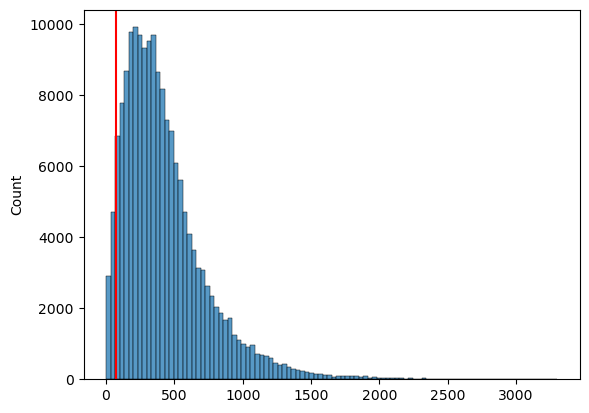

In [51]:
to_plot = df.with_columns(pl.col("pep").map_elements(lambda s: len(s)).alias("pep_len")).sort("pep_len")["pep_len"]
sns.histplot(to_plot, bins=100)
plt.axvline(70, color='r')

In [34]:
sum = pl.concat([expression.select("isoform"), expression[:, 1:].sum_horizontal().to_frame()], how = "horizontal")


/tmp/ipykernel_16828/2685584777.py:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  to_plot = df.with_columns(pl.col("pep").map_elements(lambda s: len(s)))\


<Axes: xlabel='pep', ylabel='sum'>

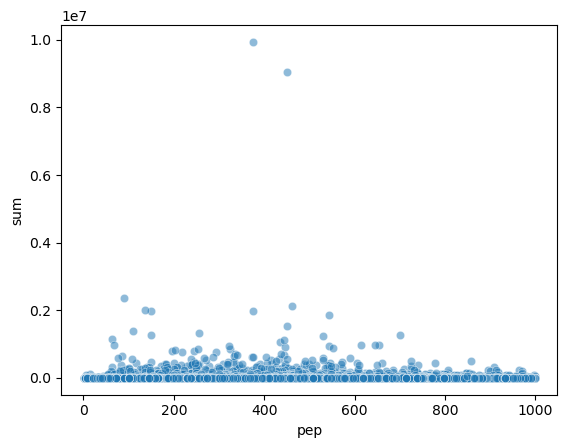

In [48]:
to_plot = df.with_columns(pl.col("pep").map_elements(lambda s: len(s)))\
    .join(
        sum.rename({"isoform": "transcript_id"}),
        on="transcript_id",
        how="left"
    )\
    .filter(pl.col("pep")<1000)

sns.scatterplot(data=to_plot, x="pep", y="sum", alpha=0.5)    